Auteur : Antoine Chesnais  
Date dernière version : 05/12/2019  
Description : Ce notebook contient la partie modélisation mixte non supervisée / supervisée des données de questions / tags issues de l'API de stackoverflow  
Librairies / modules utilisées :  
- Pandas, Numpy, collections
- re, beautifulsoup, nltk, spacy 
- Matplotlib, Seaborn, wordcloud
- sklearn

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploration-des-tags-:" data-toc-modified-id="Exploration-des-tags-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploration des tags :</a></span><ul class="toc-item"><li><span><a href="#Création-d'une-liste-des-principaux-tags" data-toc-modified-id="Création-d'une-liste-des-principaux-tags-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Création d'une liste des principaux tags</a></span></li></ul></li><li><span><a href="#Nettoyage-des-balises-du-corps-de-la-question-:" data-toc-modified-id="Nettoyage-des-balises-du-corps-de-la-question-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nettoyage des balises du corps de la question :</a></span><ul class="toc-item"><li><span><a href="#Séparation-du-code-et-du-texte" data-toc-modified-id="Séparation-du-code-et-du-texte-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Séparation du code et du texte</a></span></li><li><span><a href="#Retrait-des-<-blockquote->" data-toc-modified-id="Retrait-des-<-blockquote->-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Retrait des &lt; blockquote &gt;</a></span></li><li><span><a href="#Séparation-du-texte-et-des-liens-HTML" data-toc-modified-id="Séparation-du-texte-et-des-liens-HTML-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Séparation du texte et des liens HTML</a></span></li><li><span><a href="#Recherche-de-balises-supplémentaires-:" data-toc-modified-id="Recherche-de-balises-supplémentaires-:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Recherche de balises supplémentaires :</a></span></li></ul></li><li><span><a href="#Nettoyage-avancé-du-bloc-corps-de-question-+-titre" data-toc-modified-id="Nettoyage-avancé-du-bloc-corps-de-question-+-titre-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nettoyage avancé du bloc corps de question + titre</a></span><ul class="toc-item"><li><span><a href="#Passage-en-minuscule" data-toc-modified-id="Passage-en-minuscule-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Passage en minuscule</a></span></li><li><span><a href="#Conservation-des-caractères-alphanumériques-uniquement" data-toc-modified-id="Conservation-des-caractères-alphanumériques-uniquement-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Conservation des caractères alphanumériques uniquement</a></span></li><li><span><a href="#Première-visualisation-des-fréquences-de-mots-:" data-toc-modified-id="Première-visualisation-des-fréquences-de-mots-:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Première visualisation des fréquences de mots :</a></span></li><li><span><a href="#Mots-les-plus-fréquents-sans-Stopwords-+-Lemmatisation" data-toc-modified-id="Mots-les-plus-fréquents-sans-Stopwords-+-Lemmatisation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Mots les plus fréquents sans Stopwords + Lemmatisation</a></span></li><li><span><a href="#Retrait-d'une-liste-de-stopwords-custom-:" data-toc-modified-id="Retrait-d'une-liste-de-stopwords-custom-:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Retrait d'une liste de stopwords custom :</a></span></li></ul></li><li><span><a href="#Enregistrement-des-données-:" data-toc-modified-id="Enregistrement-des-données-:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Enregistrement des données :</a></span></li></ul></div>

In [3]:

# Librairies de manipulation de données
import pandas as pd
import numpy as np
from collections import Counter

# Librairies et modules de traitement du language naturel
import re
from bs4 import BeautifulSoup
import spacy
from spacy.lang.en import English
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Libraires d'algorithmes ML
from sklearn.feature_extraction.text import CountVectorizer

# Librairies de visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import functions

nlp = spacy.load('en_core_web_lg')

In [4]:
data = pd.read_csv('data_stackoverflow_july_october.csv')

In [5]:
display(data.head())

,title,body,tags
0,&quot;Column ambiguous defined&quot; error in ...,<p>I am working on a homework problem. I am su...,['oracle']
1,How to get the first day of the next month in ...,<p>How can I get the first date of the next mo...,"['python', 'python-datetime']"
2,Visual Studio 2019 Change code template for ne...,<p>I have done this in the past but cannot see...,"['visual-studio-2019', 'code-editor', 'code-te..."
3,Webapi inherited controllers are ignoring Rout...,<p>I want to have a Controller Hierarchy assem...,"['c#', 'asp.net', 'asp.net-web-api']"
4,How to install Font Awesome in ASP.NET Core 2....,<p>I am struggling to find any up to date inst...,['asp.net-core']


In [6]:
display(data.shape)

(247205, 3)

# Exploration des tags :

In [7]:
tags = data.tags.apply(lambda x: re.findall("'(.*?)'", x))
print(tags)

0                                                  [oracle]
1                                 [python, python-datetime]
2         [visual-studio-2019, code-editor, code-templates]
3                            [c#, asp.net, asp.net-web-api]
4                                            [asp.net-core]
                                ...                        
247200               [python, linux, python-3.x, iteration]
247201                                     [sql, in-clause]
247202                                         [r, ggplot2]
247203                                            [reactjs]
247204                                [go, stripe-payments]
Name: tags, Length: 247205, dtype: object


In [8]:
tags_vectorizer = CountVectorizer(tokenizer= lambda x: re.findall("'([^']*)'", x), binary=True)

In [9]:
sparse_y = tags_vectorizer.fit_transform(data.tags)

In [10]:
tags_count = np.squeeze(np.asarray(sparse_y.sum(axis=0)))

In [11]:
df_tags_count = pd.DataFrame([tags_vectorizer.get_feature_names(), tags_count]).T
df_tags_count.columns = ['tag', 'count']
df_tags_count.sort_values(by='count', inplace=True, ascending=False)
df_tags_count.reset_index(inplace=True, drop=True)
df_tags_count['rank'] = range(0,len(df_tags_count),1)
display(df_tags_count.head())

,tag,count,rank
0,python,35047,0
1,javascript,28808,1
2,java,15648,2
3,c#,14104,3
4,html,11460,4


In [12]:
print(df_tags_count.shape)

(23079, 3)


## Création d'une liste des principaux tags

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_tags_count.head(100))

,tag,count,rank
0,python,35047,0
1,javascript,28808,1
2,java,15648,2
3,c#,14104,3
4,html,11460,4
5,php,9946,5
6,python-3.x,9829,6
7,android,9710,7
8,reactjs,9104,8
9,r,8358,9


On sélectionne les 500 premiers tags :

In [14]:
selection = df_tags_count[0:1000]['tag']

On applique ensuite un traitement aux tags afin d'assurer pour éviter des redondances et homogénéiser certaines variantes d'un même tag :

Passage en minuscule :

In [15]:
selection = selection.str.lower()

séparation des mots composés avec un tiret :

In [16]:
selection = selection.apply(lambda x: re.findall('[^-]+', x))
selection = selection.sum()
selection = list(set(selection))
print(len(selection))

988


comme certains de ces termes seront également présents dans les questions, et que l'on appliquera un peu plus tard une lemmatisation sur celui ci, il est préférable de lemmatiser également les tags. Cela permettra de les retrouver sous la même forme dans les deux cas.

In [17]:
lemmetized_tags = []
documents = nlp.pipe(selection, disable=["tokenizer","parser", "ner", 'textcat'])
for doc in documents:
    tokens = [token.lemma_ for token in doc]
    lemmetized_tags.append(' '.join(tokens))
lemmetized_tags = pd.Series(lemmetized_tags)

In [18]:
#lemmetized_tags.to_csv('most_common_tags.csv', index=False, header=False)

# Nettoyage des balises du corps de la question :

## Séparation du code et du texte

In [98]:
print(data.body[6])

<p>I try to execute a stored procedure with Talend 7.1.1. That procedure is registered in DB '<code>SYS</code>' and she <code>TRUNCATE</code> the table in parameter (my table : <code>ODS.TEMPF_PRODUCTION</code>)</p>

<p>I put the composent <code>tDBSP (ORACLE)</code>, I connected it to my database '<code>SYS</code>' where is stored my procedure '<code>TRUNCATE_TABLE</code>' but I don't know where I need to inform my parameter <code>table_name</code>.</p>

<p>My component:
<a href="https://i.stack.imgur.com/1ONtz.png" rel="nofollow noreferrer"><img src="https://i.stack.imgur.com/1ONtz.png" alt="enter image description here"></a></p>

<p><a href="https://i.stack.imgur.com/6Io7p.png" rel="nofollow noreferrer"><img src="https://i.stack.imgur.com/6Io7p.png" alt="enter image description here"></a>
If someone can tell me what is missing, I would be grateful !</p>



Création d'une nouvelle variable contenant le code :

In [20]:
data['code_text'] = data.body.apply(lambda x: re.findall('<code>([\s\S]*?)</code>', x))

In [21]:
print(data.loc[2,'code_text'])

['    public void MyPlace()\n    {\n\n    }\n', '    public void MyPlace()\n    {\n        try\n        {\n\n        }\n        catch(Exception ex)\n        {\n            App.ProcessException(ex);\n        }\n    }\n']


Création d'une nouvelle variable qui contient le texte sans le code :

In [22]:
data['body_text'] = data.body.apply(lambda x: re.sub('<code>([\s\S]*?)</code>', '', x))

In [23]:
print(data.loc[2,'body_text'])

<p>I have done this in the past but cannot seem to find it now.  In Visual Studio 2019, I would like to change the code template for when I add a new C# function or method.  Instead of this:</p>

<pre></pre>

<p>I would like to have Visual Studio do something like this instead:</p>

<pre></pre>

<p>This will save me a great deal of time by already putting in my try catch and standard exception handler.  Any ideas on how to do that in VS 2019?</p>



## Retrait des < blockquote >

In [24]:
data['body_text'] = data.body_text.apply(lambda x: re.sub('<blockquote>([\s\S]*?)</blockquote>', '', x))

In [25]:
print(data.loc[2,'body_text'])

<p>I have done this in the past but cannot seem to find it now.  In Visual Studio 2019, I would like to change the code template for when I add a new C# function or method.  Instead of this:</p>

<pre></pre>

<p>I would like to have Visual Studio do something like this instead:</p>

<pre></pre>

<p>This will save me a great deal of time by already putting in my try catch and standard exception handler.  Any ideas on how to do that in VS 2019?</p>



## Séparation du texte et des liens HTML

In [26]:
def get_link(link_list):
    results = []
    for link in link_list:
        results.append(link.get('href'))
    return results

Récupération de tous les liens dans un objet beautifullsoup :

In [27]:
data['links'] = data.body_text.apply(lambda x: BeautifulSoup(x, 'html.parser').find_all('a'))

In [28]:
print(data['links'].head())

0                                                   []
1                                                   []
2                                                   []
3    [[https://www.strathweb.com/2012/06/using-cont...
4                                                   []
Name: links, dtype: object


In [29]:
print(data.loc[0,'links'])

[]


Modification de la colonne 'links' pour avoir les adresses directement dans une liste :

In [30]:
data['links'] = data['links'].apply(lambda x: get_link(x))

In [31]:
print(data['links'].head())

0                                                   []
1                                                   []
2                                                   []
3    [https://www.strathweb.com/2012/06/using-contr...
4                                                   []
Name: links, dtype: object


Retrait du texte contenu entre les balises de lien <a < /a>

In [32]:
data['body_text'] = data.body_text.apply(lambda x: re.sub('<a[\s\S]*?</a>', '', x))

In [33]:
print(data.loc[2,'body_text'])

<p>I have done this in the past but cannot seem to find it now.  In Visual Studio 2019, I would like to change the code template for when I add a new C# function or method.  Instead of this:</p>

<pre></pre>

<p>I would like to have Visual Studio do something like this instead:</p>

<pre></pre>

<p>This will save me a great deal of time by already putting in my try catch and standard exception handler.  Any ideas on how to do that in VS 2019?</p>



## Recherche de balises supplémentaires :

In [34]:
balises = data.body_text.apply(lambda x: re.findall("<.*?>", x))

In [35]:
print(balises)

0                     [<p>, </p>, <p>, </p>, <pre>, </pre>]
1          [<p>, </p>, <p>, </p>, <pre>, </pre>, <p>, </p>]
2         [<p>, </p>, <pre>, </pre>, <p>, </p>, <pre>, <...
3         [<p>, </p>, <p>, </p>, <pre class="lang-cs pre...
4                         [<p>, </p>, <p>, </p>, <p>, </p>]
                                ...                        
247200    [<p>, </p>, <p>, </p>, <p>, </p>, <p>, </p>, <...
247201                           [<p>, </p>, <pre>, </pre>]
247202    [<p>, </p>, <pre>, </pre>, <p>, </p>, <pre>, <...
247203                [<p>, </p>, <pre>, </pre>, <p>, </p>]
247204     [<p>, </p>, <p>, </p>, <p>, </p>, <pre>, </pre>]
Name: body_text, Length: 247205, dtype: object


De nombreuses balises sont des balises HTLM, il est donc possible dans un premier temps de faire un nettoyage avec un parser HTML comme utilisé précédemment pour identifier les liens (BeautifulSoup).

In [36]:
data['body_text'] = data.body_text.apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [37]:
print(data.loc[0,'body_text'])

I am working on a homework problem. I am supposed to return the supplier id along with the supplier name and the count of each product for the supplier where the amount of products for the supplier is greater than 2. I have everything working but when I include the supplier_id in the select statement I get the column ambiguous error.
If I remove supplier_id from the select statement everything works fine but I have to include the supplier id in my output in order to get full credit.




On regarde s'il reste des balises présentes :

In [38]:
balises = data.body_text.apply(lambda x: re.findall("<.*?>", x))

In [39]:
balises_to_remove = balises[balises.astype(bool)].value_counts()
print(balises_to_remove.shape)

(476,)


In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(balises_to_remove)

[<>]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             130
[<>, <>]                                                                                                                                                                                                                                                                                                                                                           

AU final il reste 319 questions pour lesquelles il reste du contenu entre balises, qui dans la très grande majorité des cas n'apporte pas de réelle information. On les retirera donc.

In [41]:
data['body_text'] = data.body_text.apply(lambda x: re.sub("<.*?>", '', x))

In [42]:
print(data.loc[2,'body_text'])

I have done this in the past but cannot seem to find it now.  In Visual Studio 2019, I would like to change the code template for when I add a new C# function or method.  Instead of this:

I would like to have Visual Studio do something like this instead:

This will save me a great deal of time by already putting in my try catch and standard exception handler.  Any ideas on how to do that in VS 2019?



# Nettoyage avancé du bloc corps de question + titre

On créé dans un premiers temps un séries pandas qui contiendra à la fois le texte et le titre dans une seule variable.

In [43]:
questions = data['title'] + ' ' + data['body_text']

In [44]:
display(questions)

0         &quot;Column ambiguous defined&quot; error in ...
1         How to get the first day of the next month in ...
2         Visual Studio 2019 Change code template for ne...
3         Webapi inherited controllers are ignoring Rout...
4         How to install Font Awesome in ASP.NET Core 2....
                                ...                        
247200    Removing paragraphs from multiple text files L...
247201    Select from 3 tables with IN clause Need to di...
247202    Jittering points horizontally within a grouped...
247203    How to safely unmount a component in React? By...
247204    How to get the exact amount due instead of the...
Length: 247205, dtype: object

In [45]:
print(questions[2])

Visual Studio 2019 Change code template for new functation / method I have done this in the past but cannot seem to find it now.  In Visual Studio 2019, I would like to change the code template for when I add a new C# function or method.  Instead of this:

I would like to have Visual Studio do something like this instead:

This will save me a great deal of time by already putting in my try catch and standard exception handler.  Any ideas on how to do that in VS 2019?



## Passage en minuscule

In [46]:
questions = questions.str.lower()
display(questions)

0         &quot;column ambiguous defined&quot; error in ...
1         how to get the first day of the next month in ...
2         visual studio 2019 change code template for ne...
3         webapi inherited controllers are ignoring rout...
4         how to install font awesome in asp.net core 2....
                                ...                        
247200    removing paragraphs from multiple text files l...
247201    select from 3 tables with in clause need to di...
247202    jittering points horizontally within a grouped...
247203    how to safely unmount a component in react? by...
247204    how to get the exact amount due instead of the...
Length: 247205, dtype: object

In [47]:
print(questions[1])

how to get the first day of the next month in python? how can i get the first date of the next month in python? for example, if it's now 2019-12-31, the first day of the next month is 2020-01-01. if it's now 2019-08-01, the first day of the next month is 2019-09-01.
i came up with this:

is it correct? is there a better way?



In [48]:
print(questions[2])

visual studio 2019 change code template for new functation / method i have done this in the past but cannot seem to find it now.  in visual studio 2019, i would like to change the code template for when i add a new c# function or method.  instead of this:

i would like to have visual studio do something like this instead:

this will save me a great deal of time by already putting in my try catch and standard exception handler.  any ideas on how to do that in vs 2019?



## Conservation des caractères alphanumériques uniquement

On repère et sauvegarde dans une nouvelle variable les chaînes de caratères spéciales, comme les adresses IP, les extensions de fichiers, les numéros de versions ...

### Recherche de format x.x.x ....

In [49]:
data['special_string'] = questions.apply(lambda x: re.findall("((?:[a-z0-9]*\.)+[a-z0-9]+)", x))

In [50]:
print(data.loc[2,'special_string'])

[]


On stocke ces châines de caractères spécifiques dans un nouvelle variable :

In [51]:
data['special_string'] = data['special_string'].apply(lambda x: ' '.join(x))

In [52]:
print(data.loc[2,'special_string'])

On les retire ensuite de la question :

In [53]:
alpha_questions = questions.apply(lambda x: re.sub("((?:[a-z0-9]*\.)+[a-z0-9]+)", ' ', x))

On cherche ensuite à extraire uniquement les extensions de fichiers pour les mettre dans une nouvelle variable :

In [54]:
data['files_extensions'] = data['special_string'].apply(lambda x: re.findall("\.[a-z]+", x))

In [55]:
data['files_extensions'] = data['files_extensions'].apply(lambda x: ' '.join(x))

In [56]:
print(data['files_extensions'].value_counts())

                                                                                     176143
.e                                                                                     3448
.g                                                                                     3343
.js                                                                                    2067
.net                                                                                   1628
                                                                                      ...  
.net .aspnetcore .authentication                                                          1
.d .test .what                                                                            1
.suite .yml .s                                                                            1
.iterrows .notnull                                                                        1
.apache .http .connectionclosedexception .apache .http .connectionclosedexceptio

### Recherche des mots 'c#' et 'c++' :

On recherche l'apparition de 'C++' et on stocke les occurences dans une nouvelle variable :

In [57]:
data['C++'] = questions.apply(lambda x: re.findall("c\+\+", x))

In [58]:
data['C++'] = data['C++'].apply(lambda x: ' '.join(x))

In [59]:
print(data['C++'].value_counts())

                                                                                                   243367
c++                                                                                                  2437
c++ c++                                                                                               908
c++ c++ c++                                                                                           268
c++ c++ c++ c++                                                                                       123
c++ c++ c++ c++ c++                                                                                    48
c++ c++ c++ c++ c++ c++                                                                                20
c++ c++ c++ c++ c++ c++ c++                                                                            12
c++ c++ c++ c++ c++ c++ c++ c++                                                                         9
c++ c++ c++ c++ c++ c++ c++ c++ c++           

On retire ensuite ses occurences dans les questions :

In [60]:
alpha_questions = alpha_questions.apply(lambda x: re.sub("c\+\+", ' ', x))

On recherche l'apparition de 'C#' et on stocke les occurences dans une nouvelle variable :

In [61]:
data['C#'] = questions.apply(lambda x: re.findall("c\#", x))

In [62]:
data['C#'] = data['C#'].apply(lambda x: ' '.join(x))

In [63]:
print(data['C#'].value_counts())

                                    242728
c#                                    3158
c# c#                                  926
c# c# c#                               254
c# c# c# c#                             69
c# c# c# c# c#                          39
c# c# c# c# c# c#                       17
c# c# c# c# c# c# c#                     9
c# c# c# c# c# c# c# c#                  3
c# c# c# c# c# c# c# c# c#               1
c# c# c# c# c# c# c# c# c# c# c#         1
Name: C#, dtype: int64


On retire ensuite ses occurences dans les questions :

In [64]:
alpha_questions = alpha_questions.apply(lambda x: re.sub("c\#", ' ', x))

### Retrait des autres caratères spéciaux :

et on supprime ensuite tous les caractères spéciaux à l'exception de l'apostrophe :

In [65]:
alpha_questions = alpha_questions.apply(lambda x: re.sub("[^a-zA-Z']", ' ' , x))

In [66]:
print(alpha_questions[2])

visual studio      change code template for new functation   method i have done this in the past but cannot seem to find it now   in visual studio       i would like to change the code template for when i add a new   function or method   instead of this   i would like to have visual studio do something like this instead   this will save me a great deal of time by already putting in my try catch and standard exception handler   any ideas on how to do that in vs       


Supression d'éventuels expaces en double ou plus :

In [67]:
alpha_questions = alpha_questions.apply(lambda x: re.sub("\s+", ' ', x))

In [68]:
print(alpha_questions[2])

visual studio change code template for new functation method i have done this in the past but cannot seem to find it now in visual studio i would like to change the code template for when i add a new function or method instead of this i would like to have visual studio do something like this instead this will save me a great deal of time by already putting in my try catch and standard exception handler any ideas on how to do that in vs 


## Première visualisation des fréquences de mots :

,word,count,rank
124583,the,1356518,0
126249,to,953410,1
62118,is,499769,2
58464,in,476075,3
4710,and,462783,4
...,...,...,...
87265,other,34745,95
87413,out,34187,96
110902,set,34089,97
118898,string,33755,98


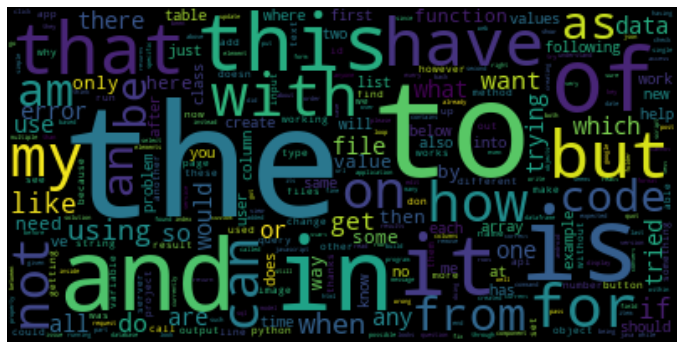

In [69]:
functions.words_freq(alpha_questions);

On se rend compte ainsi que les mots les plus fréquents sont peu informatifs, on va donc ensuite essayer de retirer les stops words.

### Mots les plus fréquents sans les stops words

Création d'une liste de stopwords :

In [70]:
stopwords_list = nltk.corpus.stopwords.words('English')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
display(alpha_questions.head())

0     quot column ambiguous defined quot error in o...
1    how to get the first day of the next month in ...
2    visual studio change code template for new fun...
3    webapi inherited controllers are ignoring rout...
4    how to install font awesome in core using visu...
dtype: object

tokenisation des questions :

In [72]:
tokenized_questions = alpha_questions.apply(lambda x: word_tokenize(x))

In [73]:
print(tokenized_questions)

0         [quot, column, ambiguous, defined, quot, error...
1         [how, to, get, the, first, day, of, the, next,...
2         [visual, studio, change, code, template, for, ...
3         [webapi, inherited, controllers, are, ignoring...
4         [how, to, install, font, awesome, in, core, us...
                                ...                        
247200    [removing, paragraphs, from, multiple, text, f...
247201    [select, from, tables, with, in, clause, need,...
247202    [jittering, points, horizontally, within, a, g...
247203    [how, to, safely, unmount, a, component, in, r...
247204    [how, to, get, the, exact, amount, due, instea...
Length: 247205, dtype: object


Retrait des stopwords :

In [74]:
question_wth_stopwords = tokenized_questions.apply(lambda x: ' '.join([t for t in x if t not in stopwords_list]))

,word,count,rank
20694,code,132367,0
133286,using,126962,1
68885,like,114841,2
48867,get,101959,3
136257,want,101559,4
...,...,...,...
131889,update,19297,95
64793,json,19158,96
28961,date,18776,97
46369,found,18758,98


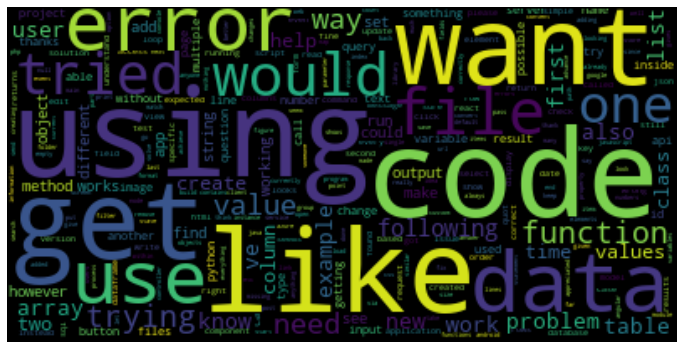

In [75]:
functions.words_freq(question_wth_stopwords);

Cette fois ci, le vocabulaire est plus informatif, mais reste en fait un language commun partagé par de nombreuses questions sur stackoverflow. On retrouve notamment les champs lexicaux :

- De la programation : data, functions, values, set , file, app ....
- Celui de la volonté : like, would, want, need ...
- Celui de l'essai : trying, tried, error, problem ...

On cherchera ensuite à éliminer ce vocabulaire commun pour faire ressortir les informations qui distinguent vraiment les questions entre elles. Pour se faire on essaiera de réduire en premier lieu au maximum le nombre de ces mots à retirer en enlevant les différentes variantes (ex : use, using, used ..) en retenant uniquement le lemme des mots.

## Mots les plus fréquents sans Stopwords + Lemmatisation

On ajoute une étape de nettoyage supplémentaire, la lemmatisation, qui devrait permettre de limiter les variantes d'une même racine, comme like et liked par exemple. On en profite également pour retirer les verbes, adverbes et adjectifs car ce qui nous intéresse essentiellement pour la prédiction de tags est le vocabulaire technique, constitué essentiellement de noms.

In [76]:
docs = question_wth_stopwords.tolist()

In [77]:
lemmetized_questions = []
forbiden_POS = ['ADJ', 'VERB', 'ADV']
documents = nlp.pipe(docs, disable=["parser", "ner", 'textcat'])
for doc in documents:
    tokens = [token.lemma_ for token in doc if token.pos_ not in forbiden_POS]
    lemmetized_questions.append(' '.join(tokens))

In [78]:
print(lemmetized_questions[2])

studio change code template functation method past studio would change code template function method would studio something like deal time try exception handler idea vs


In [79]:
print(question_wth_stopwords[2])

visual studio change code template new functation method done past seem find visual studio would like change code template add new function method instead would like visual studio something like instead save great deal time already putting try catch standard exception handler ideas vs


On stocke les questions lemmatisée dans une nouvelle variable.

In [80]:
data['spacy_lemmetized_text'] = lemmetized_questions

In [81]:
display(data.head())

,title,body,tags,code_text,body_text,links,special_string,files_extensions,C++,C#,spacy_lemmetized_text
0,&quot;Column ambiguous defined&quot; error in ...,<p>I am working on a homework problem. I am su...,['oracle'],"[SELECT supplier_id, name, count(*) \nfrom sup...",I am working on a homework problem. I am suppo...,[],,,,,quot column ambiguous quot error oracle homewo...
1,How to get the first day of the next month in ...,<p>How can I get the first date of the next mo...,"['python', 'python-datetime']",[import datetime\n\ndef first_day_of_next_mont...,How can I get the first date of the next month...,[],,,,,get day month python date month python example...
2,Visual Studio 2019 Change code template for ne...,<p>I have done this in the past but cannot see...,"['visual-studio-2019', 'code-editor', 'code-te...","[ public void MyPlace()\n {\n\n }\n, ...",I have done this in the past but cannot seem t...,[],,,,c#,studio change code template functation method ...
3,Webapi inherited controllers are ignoring Rout...,<p>I want to have a Controller Hierarchy assem...,"['c#', 'asp.net', 'asp.net-web-api']",[public abstract class EntityController&lt;T&g...,I want to have a Controller Hierarchy assembly...,[https://www.strathweb.com/2012/06/using-contr...,i.e,.e,,,webapi controller route attribute controller h...
4,How to install Font Awesome in ASP.NET Core 2....,<p>I am struggling to find any up to date inst...,['asp.net-core'],[],I am struggling to find any up to date install...,[],asp.net 2.2 asp.net 2.2 2.2 asp.net,.net .net .net,,,font core studio date installation guide core ...


,word,count,rank
17748,code,134268,0
58602,like,100600,1
36664,file,96151,2
113313,value,95214,3
33559,error,90387,4
...,...,...,...
90765,run,14249,95
112049,url,13589,96
28424,display,13570,97
81636,program,13513,98


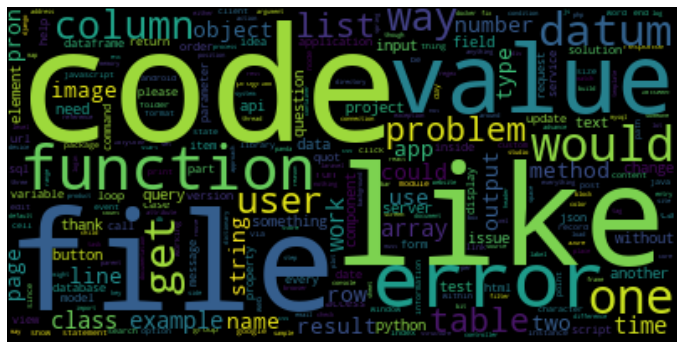

In [82]:
wf = functions.words_freq(lemmetized_questions)

Après cette étape il reste du vocabulaire technique partagé entre beaucoup de questions informatiques  comme code, filev value ou bien encore des mots comme like, thank, another. Il est intéressant de retirer ce vocabulaire comme pour limiter la pollution du dataset avec des features non informatives.  
Pour cela on enregistrera une liste des 500 mots les plus représentés à ce stade, et l'on retirera ensuite manuellement de cette liste des entrées qui pourraient être potentiellement des tags. Il nous restera une liste de mots fréquents mais indésirables que l'on pourra retirer du corpus de la même manière que les stopwords.

In [83]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(wf[:200])

,word,count,rank
17748,code,134268,0
58602,like,100600,1
36664,file,96151,2
113313,value,95214,3
33559,error,90387,4
39929,function,74072,5
117798,would,71704,6
73042,one,70332,7
24975,datum,65094,8
41201,get,64670,9


In [84]:
wf['count'] = pd.to_numeric(wf['count'])

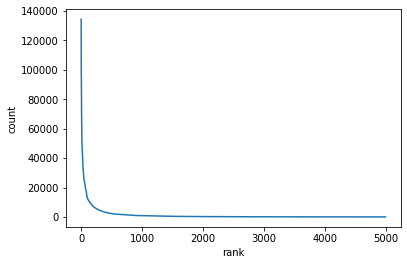

In [85]:
sns.lineplot(x='rank', y='count', data=wf[:5000])

In [86]:
#wf['word'][:500].to_csv('most_common_words.csv', index=False, header=False)

## Retrait d'une liste de stopwords custom :

Comme mentionné à l'étape précédente, on retire maintenant une liste de mots qui sont fréquents mais non souhaités car partagés par un trop grand nombre de questions.

In [87]:
words_to_remove = pd.read_csv('words_to_remove.csv', header=None)[0].tolist()

In [88]:
display(words_to_remove)

['code',
 'like',
 'function',
 'value',
 'file',
 'error',
 'would',
 'one',
 'get',
 'way',
 'problem',
 'example',
 'work',
 'use',
 'output',
 'number',
 'result',
 'two',
 'line',
 'name',
 'type',
 'pron',
 'page',
 'could',
 'something',
 'element',
 'change',
 'input',
 'thank',
 'question',
 'need',
 'project',
 'another',
 'without',
 'test',
 'field',
 'issue',
 'component',
 'case',
 'script',
 'solution',
 'message',
 'item',
 'help',
 'quot',
 'variable',
 'version',
 'request',
 'call',
 'please',
 'every',
 'inside',
 'order',
 'idea',
 'part',
 'run',
 'program',
 'display',
 'within',
 'thing',
 'since',
 'option',
 'content',
 'custom',
 'anyone',
 'end',
 'edit',
 'post',
 'information',
 'be',
 'size',
 'answer',
 'via',
 'search',
 'working',
 'default',
 'everything',
 'someone',
 'not',
 'directory',
 'etc',
 'nothing',
 'anything',
 'check',
 'reason',
 'product',
 'lot',
 'system',
 'either',
 'sample',
 'must',
 'difference',
 'documentation',
 'may',
 'appro

In [89]:
tokenized_questions = data['spacy_lemmetized_text'].apply(lambda x: word_tokenize(x))
question_VF = tokenized_questions.apply(lambda x: ' '.join([t for t in x if t not in words_to_remove]))

# Enregistrement des données :

,word,count,rank
24948,datum,65094,0
18351,column,54055,1
112226,user,51143,2
103495,table,49050,3
58935,list,47549,4
...,...,...,...
61759,map,8095,95
98301,source,8093,96
45653,header,8025,97
101317,structure,7957,98


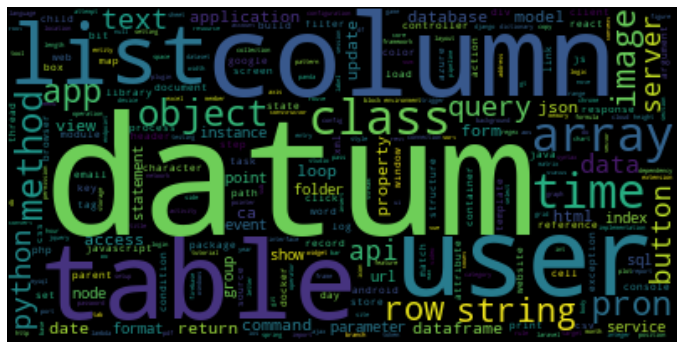

In [90]:
functions.words_freq(question_VF);

Cette fois ci on obtient des mots plus techniques et plus spécifiques à certains domaines de l'informatique et du développement.

In [91]:
data['cleaned_questions'] = question_VF

In [92]:
# data.to_csv('cleaned_dataset.csv', index=False)